## Cargar los datos

In [32]:
import pandas as pd

file_path = 'traffic_simulation_data.csv' 
df = pd.read_csv(file_path)


df = df.drop(columns=['Unnamed: 0'])
 
# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()
df

,cars_semaphore_delay,cars_delay,walker_semaphore_delay,walkers_delay
0,3.680,29.350,1.680,25.490
1,1.470,22.860,1.100,21.220
2,1.780,38.930,4.070,19.200
3,3.620,23.700,1.660,21.020
4,1.100,26.660,1.840,26.360
...,...,...,...,...
395,1.150,19.490,3.860,26.500
396,3.000,24.390,0.870,10.770
397,3.020,20.000,2.500,7.620
398,1.610,33.440,1.680,22.080


In [33]:
import pandas as pd

pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,cars_semaphore_delay,cars_delay,walker_semaphore_delay,walkers_delay
count,400.000,400.000,400.000,400.000
mean,2.928,30.247,1.900,20.003
std,1.022,7.314,0.960,4.719
min,-0.470,12.750,-0.830,6.060
25%,2.260,25.215,1.282,16.740
50%,2.950,30.185,1.970,20.290
75%,3.570,35.302,2.532,23.270
max,5.680,51.340,4.550,35.950


## Mostrar histograma con los datos

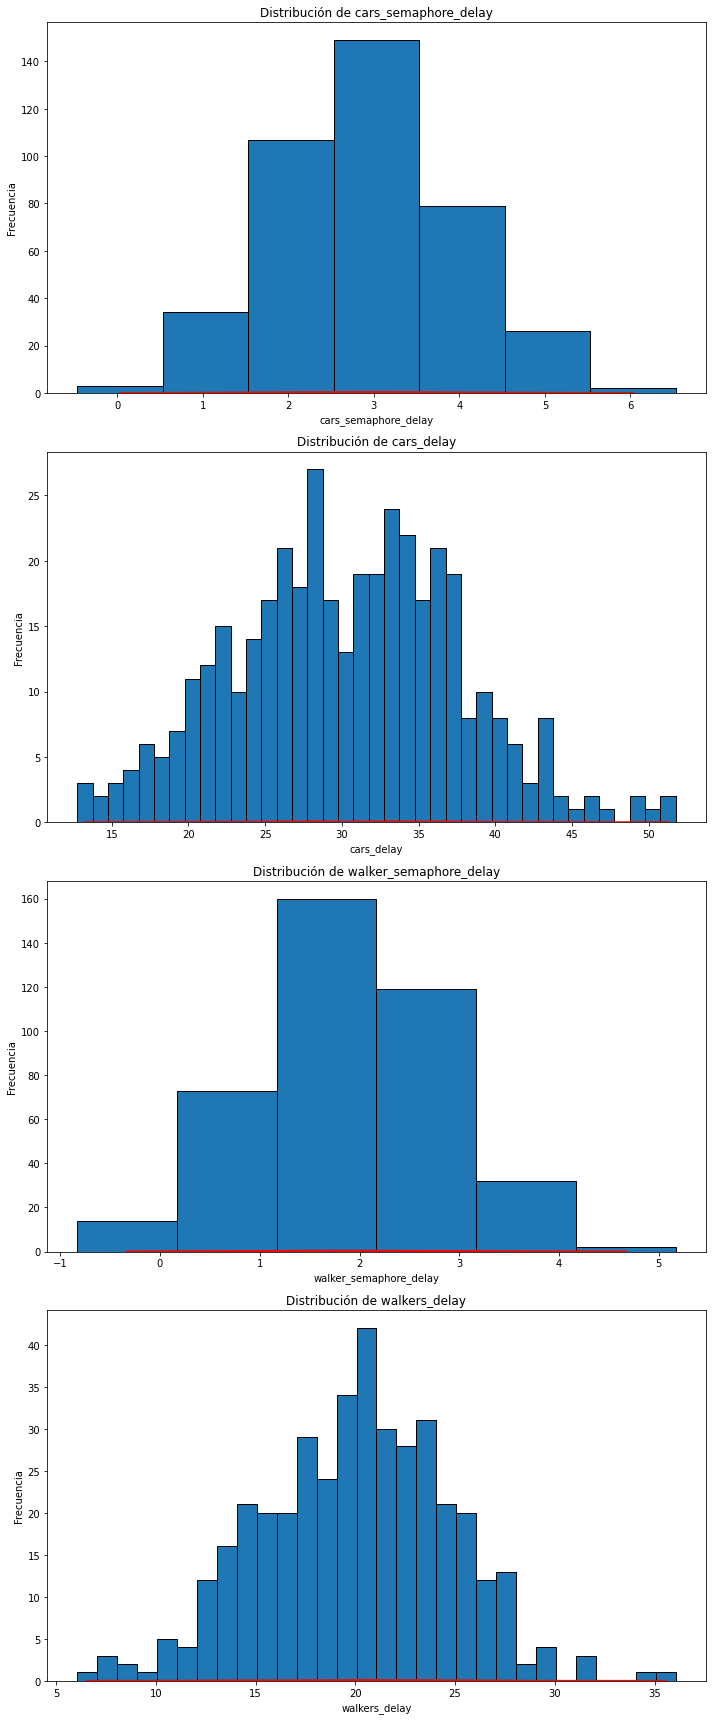

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have your DataFrame loaded as 'df'

fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, 6*len(df.columns)))

for i, column in enumerate(df.columns):
    values = df[column].values.flatten()  # Flatten the array
    n, bins, patches = axes[i].hist(values, bins=np.arange(min(values), max(values)+1, 1), edgecolor='black')
    
    # Add a kernel density estimation
    density = np.histogram(values, bins=bins, density=True)[0]
    axes[i].plot((bins[:-1] + bins[1:]) / 2, density, 'r-', linewidth=2)
    
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# If you want to save the plots as separate figures
for i, column in enumerate(df.columns):
    fig, ax = plt.subplots(figsize=(10, 6))
    values = df[column].values.flatten()
    n, bins, patches = ax.hist(values, bins=np.arange(min(values), max(values)+1, 1), edgecolor='black')
    
    # Add a kernel density estimation
    density = np.histogram(values, bins=bins, density=True)[0]
    ax.plot((bins[:-1] + bins[1:]) / 2, density, 'r-', linewidth=2)
    
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    
    plt.savefig(f'{column}_distribution.png')
    plt.close(fig)

Como podemos apreciar, ninguna de nuestras variables tiene un comportamiento normal

## Análisis de normalidad

In [35]:
for x in df.columns:
    print(f"El kurtosis de {x} es {df[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df[x].skew()}")

El kurtosis de cars_semaphore_delay es 0.001075483006254263
La Asimetría de cars_semaphore_delay es -0.06711034178782763
El kurtosis de cars_delay es -0.1618612167665483
La Asimetría de cars_delay es 0.08183397861181796
El kurtosis de walker_semaphore_delay es -0.056284418913179035
La Asimetría de walker_semaphore_delay es -0.08417427207958587
El kurtosis de walkers_delay es 0.1232743565785932
La Asimetría de walkers_delay es -0.0625683257681489


### Test de Normalidad

In [36]:
from scipy.stats import kstest, shapiro


for x in df.columns:
    test = df[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

cars_semaphore_delay
D = 0.8449280643628496
p-value = 4.449168813566549e-81

cars_delay
D = 1.0
p-value = 0.0

walker_semaphore_delay
D = 0.6695458067395503
p-value = 9.697234455900337e-45

walkers_delay
D = 0.9999999999998664
p-value = 0.0



## Matriz de Correlación

Mediante la matriz de correlación veremos la relación entre las variables y nos dará una idea de las variables a seleccionar

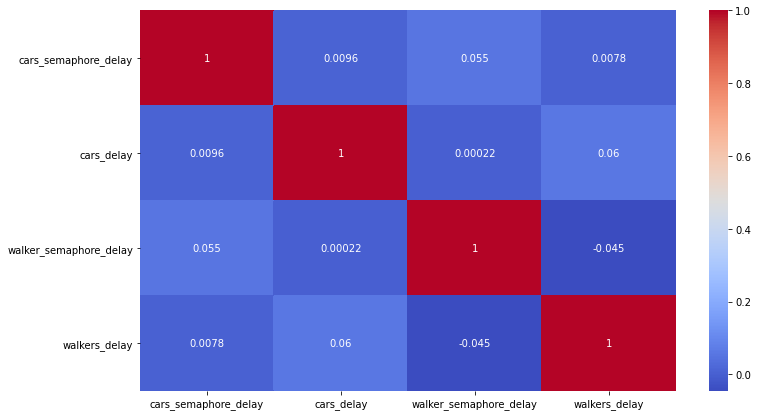

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
# print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Modelos de Regresion Lineal

In [38]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('lost_cars', axis=1) # Variables independientes
y = df['lost_cars'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['lost_cars'] not found in axis"

In [ ]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              lost_cars   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     75.18
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           8.06e-43
Time:                        23:25:55   Log-Likelihood:                -3227.6
No. Observations:                 800   AIC:                             6463.
Df Residuals:                     796   BIC:                             6482.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 185.98984668210483
Coeficiente de Determinación R^2: 0.27549495041259653


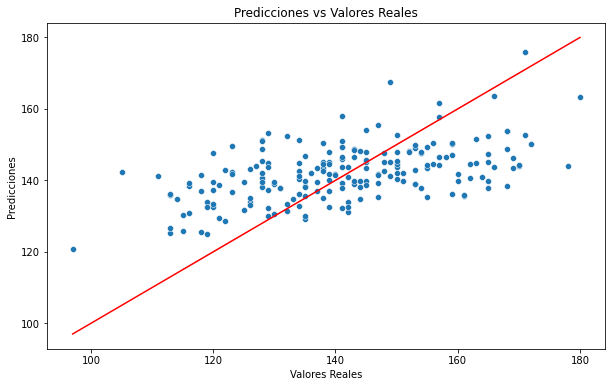

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Como observamos anteriormente en los resultados de **model.summary()** vemos que hay una variable cuyo $P > |t|$ es mayor que 0.05, lo cual indica que no es significativa en el modelo y puede llevar a errores en el resultado. Por lo que hagamos otro modelo pero esta vez eliminandola.

## Análisis de residuos

In [ ]:
residuos = model.resid

In [ ]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: 6.59596821606101e-13
La media de los residuos es cero.
Suma de los residuos: 5.279616743791848e-10
La suma de los residuos es cero.


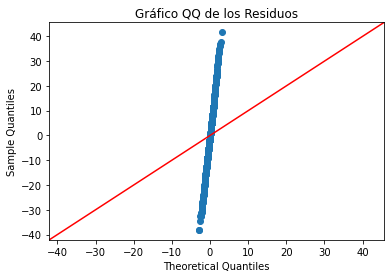

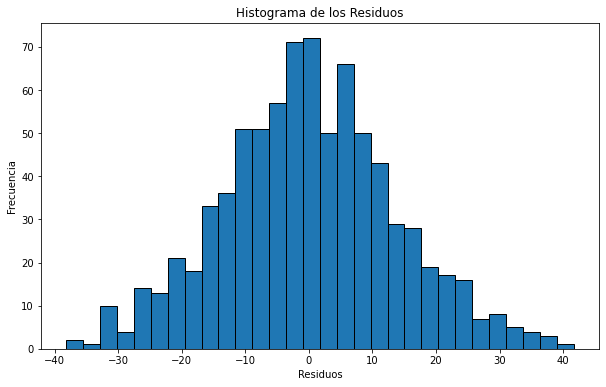

In [ ]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

Como vemos los residuos del modelo no siguen una distribución normal, esto puede tener varias implicaciones:

- Inferencias estadísticas: Muchos métodos estadísticos, incluyendo la regresión lineal y ANOVA, asumen que los residuos son normalmente distribuidos. Si esta suposición se viola, las inferencias estadísticas (como los intervalos de confianza y las pruebas de hipótesis) que se basan en el modelo pueden no ser válidas.
- Eficiencia del modelo: Un modelo con residuos no normales puede no ser el modelo más eficiente para los datos. Es posible que exista otro modelo que se ajuste mejor a estos.
- Violación de otros supuestos: Los residuos no normales a menudo indican que se están violando otros supuestos del modelo. Por ejemplo, podrían sugerir que la relación entre las variables no es lineal, o que la varianza de los residuos no es constante (heterocedasticidad).

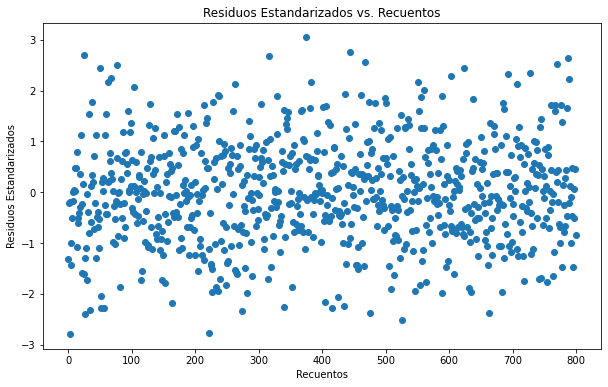

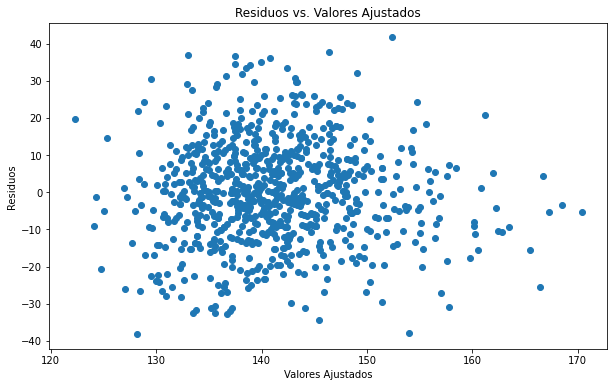

[('Lagrange multiplier statistic', 1.9422790502873433), ('p-value', 0.5844729069015948), ('f-value', 0.6457570187566835), ('f p-value', 0.5857679904746673)]


In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

### Test de Kolmogorov-Smirnov

In [ ]:
# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

D = 0.42731990971481915, p-value = 3.970638330201203e-133
Los residuos no parecen estar normalmente distribuidos.


### Conclusiones de los residuos del modelo

Los residuos no están normalmente distribuidos